In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
pf_names = {"aws" : "AWS", "native" : "Workers", "container" : "Containers"}
data = []
for id in [501, 502, 503]:
    for platform in ["aws", "native", "container"]:
        try:
            df = pd.read_csv(f"./results/{id}-python-{platform}/perf-cost/result.csv")
            df["Platform"] = pf_names[platform]
            df["id"] = id
            data.append(df)
        except Exception:
            pass
data = pd.concat(data)


In [17]:
data

,memory,type,is_cold,exec_time,connection_time,client_time,provider_time,mem_used,platform,id
0,256,sequential,False,325,0.186564,216732,1980,52.0,aws,501
1,256,sequential,False,313,0.042134,83600,1920,52.0,aws,501
2,256,sequential,False,284,0.042442,76055,1670,52.0,aws,501
3,256,sequential,False,320,0.048637,93395,1830,52.0,aws,501
4,256,sequential,False,324,0.044339,78313,7170,52.0,aws,501
...,...,...,...,...,...,...,...,...,...,...
145,256,warm,False,5999,0.035369,64889,0,0.0,native,503
146,256,warm,False,6000,0.045415,74287,0,0.0,native,503
147,256,warm,False,5999,0.048052,73753,0,0.0,native,503
148,256,warm,False,116000,0.042416,1854607,0,0.0,native,503


In [23]:
data_aws[501].describe() 

,memory,exec_time,connection_time,client_time,provider_time,mem_used
count,150.0,150.000000,150.000000,150.000000,150.000000,140.000000
mean,256.0,190693.526667,0.046996,369872.506667,198089.793333,51.921429
std,0.0,270421.385482,0.014493,397946.316209,276574.700545,0.270035
min,256.0,266.000000,0.034446,67650.000000,0.000000,51.000000
25%,256.0,313.000000,0.041341,83188.500000,1870.000000,52.000000
50%,256.0,330.000000,0.044129,95550.500000,2085.000000,52.000000
75%,256.0,553648.750000,0.048088,893228.000000,571562.500000,52.000000
max,256.0,617024.000000,0.186564,983937.000000,636990.000000,52.000000


In [25]:
data_nat[501][data_nat["type"] == "sequential"].describe()


KeyError: 'type'

In [4]:
seq_aws = data_aws[503].head(50)
seq_nat = data_nat[503].head(50)

In [8]:
data_aws

{501:      memory        type  is_cold  exec_time  connection_time  client_time  \
 0       256  sequential    False        325         0.186564       216732   
 1       256  sequential    False        313         0.042134        83600   
 2       256  sequential    False        284         0.042442        76055   
 3       256  sequential    False        320         0.048637        93395   
 4       256  sequential    False        324         0.044339        78313   
 ..      ...         ...      ...        ...              ...          ...   
 145     256        warm    False        324         0.043867        78992   
 146     256        warm    False        361         0.036613        79494   
 147     256        warm    False        389         0.048084        89228   
 148     256        warm    False        321         0.043721        82307   
 149     256        warm    False        347         0.071531       110311   
 
      provider_time  mem_used  
 0             1980      

<Axes: ylabel='exec_time'>

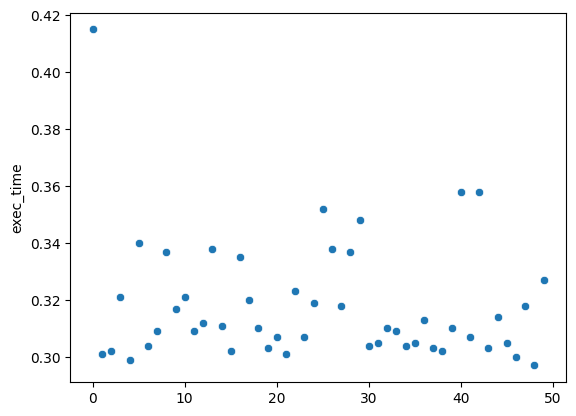

In [47]:
sns.scatterplot(seq_aws["exec_time"] / 1000)

### Notes

#### Sequential
In 501-python-aws, there are some large outliers in exec_time.
Otherwise, exec_time generally shows that aws needs 300, while cloudflare workers need 6000

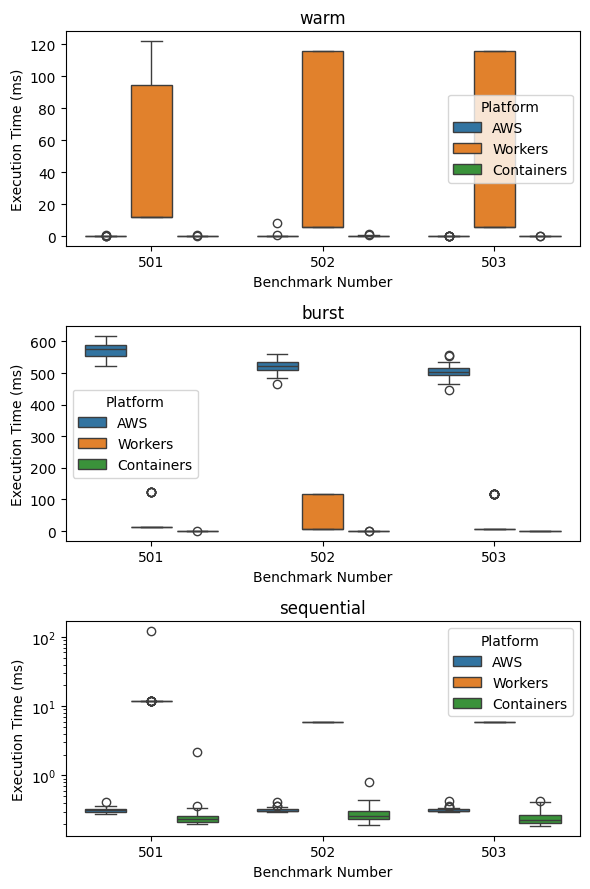

In [53]:

fig, axs = plt.subplots(3)
fig.set_figwidth(6)
fig.set_figheight(9)
types = ["warm", "burst", "sequential"]
for ax, t in zip(axs, types):
    data_plot = pd.DataFrame.copy(data[data["type"] == t])
    data_plot["exec_time"] /= 1000

    if t == "sequential":
        ax.set_yscale("log")
    ax.set_ylabel("Execution Time (ms)")
    ax.set_xlabel("Benchmark Number")
    ax.set_title(t)
    sns.boxplot(data_plot, x="id", y="exec_time", hue="Platform", gap=0.1, ax= ax)
fig.tight_layout()

In [54]:
data.to_csv("all500results_new_aws.csv")